<a href="https://colab.research.google.com/github/seonwoojh/Perfect_Guide_Python/blob/main/09_PerfectGuide_%ED%94%BC%EB%A7%88_%EC%9D%B8%EB%94%94%EC%96%B8_%EB%8B%B9%EB%87%A8%EB%B3%91_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 피마 인디언 당뇨병 예측

## 라이브러리 임포트 및 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0또는 1)

In [4]:
# 데이터 로드 및 미리보기
df = pd.read_csv('/content/drive/MyDrive/PerfectGuide_ML/dataset/diabetes.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# 타겟값 확인하기
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## 함수정의하기 :  get_clf_eval() / precision_recall_curve_plot()

In [7]:
# get_clf_eval - 평가지표를 위한 함수정의
def get_clf_eval(y_test, y_pred, pred_proba):
  confusion = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  print('오차행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
  F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [8]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
  # 임곗값 ndarray와 임곗값에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold값, y축을 정밀도, 재현율값으로 각각 plot 수행, 정밀도는 점선으로
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
  # threshold 값 X 축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

## Logistic Regression으로 학습 및 예측 수행하기

In [9]:
X = df.iloc[:,:-1]
y= df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
# roc_auc_score 수정에 따른 추가
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741,  F1: 0.6392, AUC:0.7270


### precision recall 그림

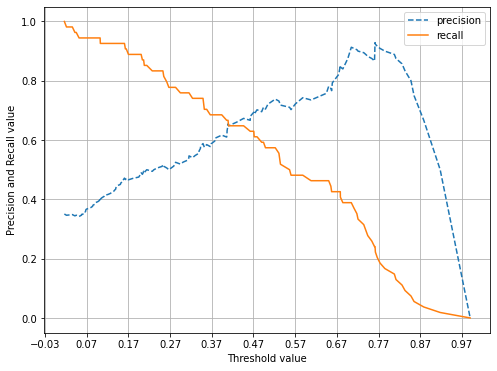

In [10]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

## 분포 확인하기

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


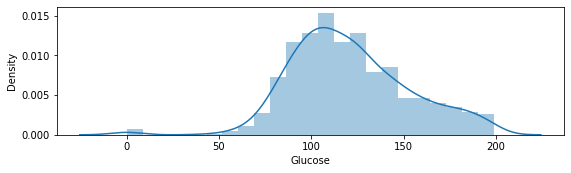

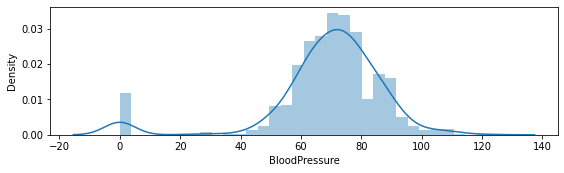

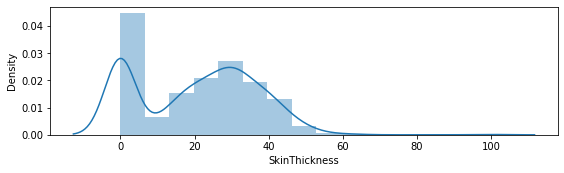

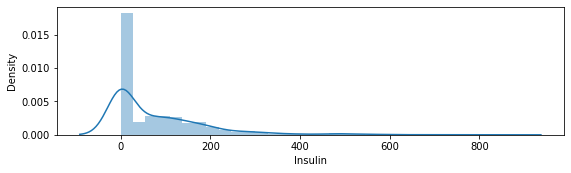

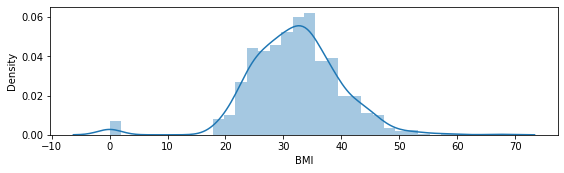

In [13]:
# 반복문을 이용하여 0이 있는 컬럼에 대해서 distplot 그리기

columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in range(5):
  plt.figure(figsize=(20,8))
  plt.subplot(3,2,i+1)
  sns.distplot(a=df[columns[i]])

In [38]:
# 0값을 평균값으로 대체
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in columns:
  df[col].replace(0, df[col].mean(),inplace=True)

## Standard Scaler를 이용하여 피처데이터 세트에 일괄적으로 스케일링 적용 후 0값을 평균값으로 대체한 데이터 세트로 학습/예측 


In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2,
                                                    random_state = 156, stratify=y)

# 로지스틱 회귀모형 학습 후 예측 및 평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

# roc_auc score
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,  F1: 0.6804, AUC:0.7556


# 분류결정 임계값을 변경하면서 성능측정

In [44]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        # roc_auc_score 관련 수정
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [45]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차행렬
[[69 31]
 [13 41]]
정확도: 0.7143, 정밀도: 0.5694, 재현율: 0.7593,  F1: 0.6508, AUC:0.7246
임곗값: 0.33
오차행렬
[[74 26]
 [17 37]]
정확도: 0.7208, 정밀도: 0.5873, 재현율: 0.6852,  F1: 0.6325, AUC:0.7126
임곗값: 0.36
오차행렬
[[76 24]
 [18 36]]
정확도: 0.7273, 정밀도: 0.6000, 재현율: 0.6667,  F1: 0.6316, AUC:0.7133
임곗값: 0.39
오차행렬
[[79 21]
 [19 35]]
정확도: 0.7403, 정밀도: 0.6250, 재현율: 0.6481,  F1: 0.6364, AUC:0.7191
임곗값: 0.42
오차행렬
[[81 19]
 [20 34]]
정확도: 0.7468, 정밀도: 0.6415, 재현율: 0.6296,  F1: 0.6355, AUC:0.7198
임곗값: 0.45
오차행렬
[[85 15]
 [20 34]]
정확도: 0.7727, 정밀도: 0.6939, 재현율: 0.6296,  F1: 0.6602, AUC:0.7398
임곗값: 0.48
오차행렬
[[88 12]
 [21 33]]
정확도: 0.7857, 정밀도: 0.7333, 재현율: 0.6111,  F1: 0.6667, AUC:0.7456
임곗값: 0.5
오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,  F1: 0.6804, AUC:0.7556
